### Notebook to test OptoSim photon transport

In [1]:
import sys
sys.path.insert(0,'../python/')
from OpticalPhoton import *
import matplotlib.pyplot as plt
import matplotlib as mpl

#### Setup the system geometry

In [2]:
ztop = 10.0 # z position of top PMT plane (cm)
zbot = -150.0 # z position of bottom PMT plane (cm)
R = 65. # radius of the TPC (cm)

#### Setup the simulation parameters

In [3]:
n_photon = 100000 # number of photons to simulate
x0 = (0., 30., 1.0) # starting position of the photons

no_scatter = False # set to True if you want to compare to a case without scattering
experimental_scatter_model = True # model for scattering from GXe/LXe on PTFE

#### Simulate photon transport

In [4]:
%%time
myPhoton = OpticalPhoton(zbot=zbot, ztop=ztop, R=R)
# if you want to compare your result to the no-scatter case
myPhoton.set_no_scattering(no_scatter)
# turn ON/OFF the GXe/GXe -> PTFE scattering model
myPhoton.set_experimental_scatter_model(experimental_scatter_model)

xb = []
yb = []
xt = []
yt = []

for i in range(n_photon):
    if i%10000 == 0:
        print('processed ',i,' photons')
    # normal
    myPhoton.generate_photon(x0=x0)
    #myPhoton.set_photon_direction(np.array([0,0,-1]))
    myPhoton.propagate()
    
    if myPhoton.is_detected():
        x = myPhoton.get_photon_position()
        #myPhoton.print()
        if x[2]<0:
            xb.append(x[0])
            yb.append(x[1])
        else:
            xt.append(x[0])
            yt.append(x[1])

    
xb = np.array(xb)
yb = np.array(yb)
xt = np.array(xt)
yt = np.array(yt)

print(len(xb), len(xt))

processed  0  photons
processed  10000  photons
processed  20000  photons
processed  30000  photons
processed  40000  photons
processed  50000  photons
processed  60000  photons
processed  70000  photons
processed  80000  photons
processed  90000  photons
33146 40101
CPU times: user 26 s, sys: 151 ms, total: 26.1 s
Wall time: 33.3 s


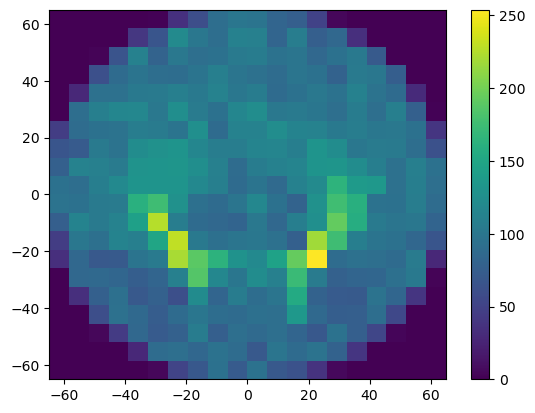

In [11]:
a = 1
h2=plt.hist2d(xb,yb,bins=(20,20),range=((-a*R,a*R),(-a*R,a*R)))#, norm=mpl.colors.LogNorm())
plt.colorbar()

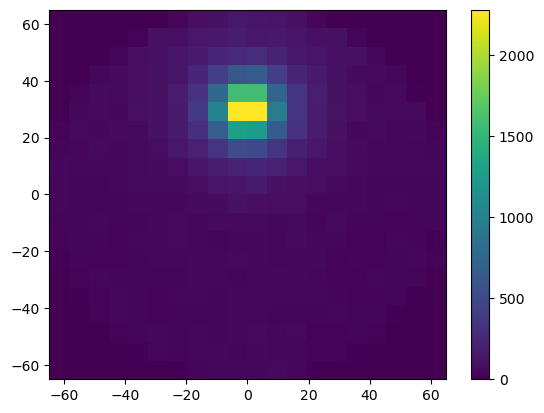

In [12]:
h2=plt.hist2d(xt,yt,bins=(20,20),range=((-R,R),(-R,R)))#, norm=mpl.colors.LogNorm())
plt.colorbar()

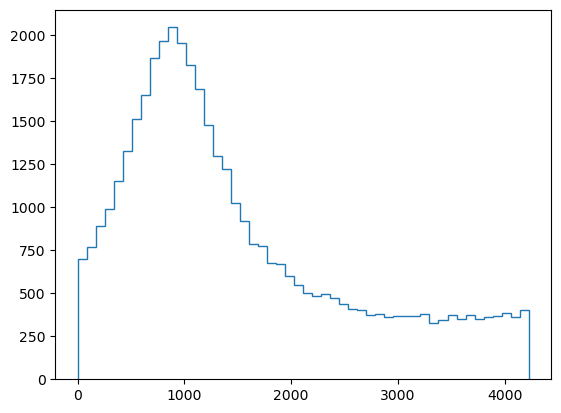

In [13]:
plt.hist((xt**2+yt**2),bins=50,range=(0,R**2), histtype='step')
# plt.hist(yb,bins=50,range=(-R,R), histtype='step')
plt.yscale('linear')

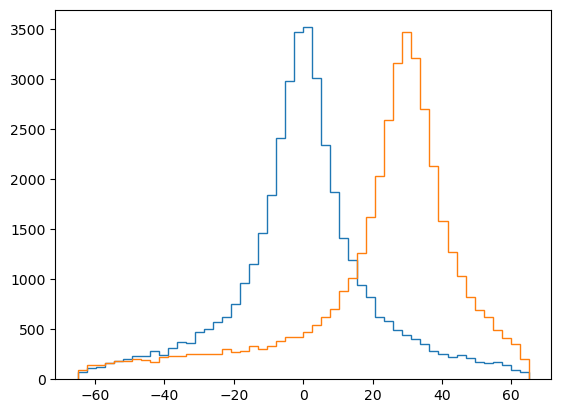

In [14]:
plt.hist(xt,bins=50,range=(-R,R), histtype='step')
plt.hist(yt,bins=50,range=(-R,R), histtype='step')


plt.yscale('linear')

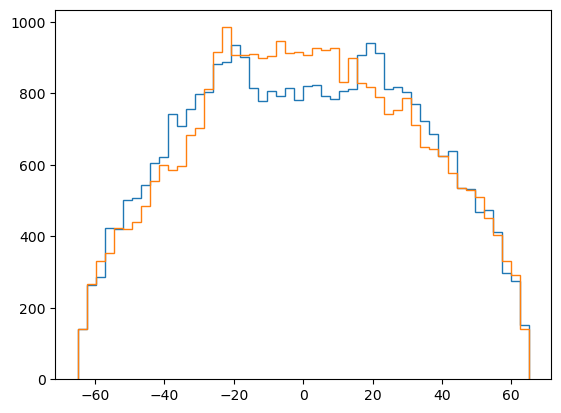

In [16]:
plt.hist(xb,bins=50,range=(-R,R), histtype='step')
plt.hist(yb,bins=50,range=(-R,R), histtype='step')


plt.yscale('linear')

In [10]:
from numba import njit